# Telecom Customer Churn

For this module examination, I would use data from Kaggle regarding Customer Churn Rate.

Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

<b> Coloumns Descriptions  </b>
- customerID = Customer ID
- gender = Whether the customer is a male or a female
- SeniorCitizen = Whether the customer is a senior citizen or not (1, 0)
- Partner = Whether the customer has a partner or not (Yes, No)
- Dependents = Whether the customer has dependents or not (Yes, No)
- tenure = Number of months the customer has stayed with the company
- PhoneService = Whether the customer has a phone service or not (Yes, No)
- MultipleLines = Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService = Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity = Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup = Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection = Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport = Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV = Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies = Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract = The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling = Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod = The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges = The amount charged to the customer monthly
- TotalCharges = The total amount charged to the customer
- Churn = Whether the customer churned or not (Yes or No)

In this exam, the maximum point is 100 with the criterion is shown below:
- The Coding Part would yield the maximum point of 30
- 5 Question with score of:
    - Q1 : 5 Point
    - Q2 : 5 Point
    - Q3 : 10 Point
    - Q4 : 5 Point
    - Q5 : 45 Point

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Churn_ujian.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.describe(exclude='number').T

,count,unique,top,freq
customerID,7043,7043,5950-AAAGJ,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [7]:
table =pd.DataFrame()
data = {'dataFeatures':[],'datatype':[],'null':[],'nullpct':[],'unique':[],'uniqueSample':[]}
list_=[]
for i in df:
    list_.append([i,
    df[i].dtypes,
    df[i].isna().sum(),
    round((df[i].isna().sum()/len(df)*100),2),
    df[i].nunique(),
    df[i].drop_duplicates().sample(2).values])
    
data=pd.DataFrame(list_,columns=['dataFeature','Type','null','null %','unique','unique sample'])

data

,dataFeature,Type,null,null %,unique,unique sample
0,customerID,object,0,0.0,7043,"[9323-HGFWY, 0486-LGCCH]"
1,gender,object,0,0.0,2,"[Female, Male]"
2,SeniorCitizen,int64,0,0.0,2,"[0, 1]"
3,Partner,object,0,0.0,2,"[No, Yes]"
4,Dependents,object,0,0.0,2,"[No, Yes]"
5,tenure,int64,0,0.0,73,"[71, 51]"
6,PhoneService,object,0,0.0,2,"[Yes, No]"
7,MultipleLines,object,0,0.0,3,"[Yes, No]"
8,InternetService,object,0,0.0,3,"[No, DSL]"
9,OnlineSecurity,object,0,0.0,3,"[Yes, No internet service]"


We have no missing value, but as we can see the column TotalCharges have an object data type but when we sampled it they had some numerical value. Let's try to convert this column data type to float

It seems there is some string data that could not be converted to float, Let's try to find the row that is problematic

In [8]:
_list=[' ']
df_string= df[df.TotalCharges.isin(_list)]
df_string

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


There are 11 datas with string space character at the TotalCharges Column

## Question 1
In your opinion, Why this datas filled with empty String? Is it related with another column?

## ANswer :

the rows that had an empty string for Total Charges may be related with the churn column.
This is because all of the aforementioned rows all have churn values of NO. meaning that all those customers are still subscribed to the companies services. Hence the reason why their total charges are empty may be because they have already payed for everything before hand, meaning that they do not have anything to pay for anymore

Try to replace this string value with 0 and convert the Total Charges to the float data type now

In [9]:
df.at[list(df_string.index),'TotalCharges'] = 0

In [10]:
df['TotalCharges']=df['TotalCharges'].astype('float')

Check once more the data row that was previously have string value to make sure the data have been replaced by 0

In [11]:
df.iloc[df_string.index]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


I find it interesting that some people still pay their bill via mailed check, lets try to filter the dataset to only get the data with Mailed check class from the PaymentMethod feature

In [13]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df[df['PaymentMethod']=='Mailed check']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
10,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
29,8773-HHUOZ,Female,0,No,Yes,17,Yes,No,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,64.70,1093.10,Yes
32,6827-IEAUQ,Female,0,Yes,Yes,27,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,One year,No,Mailed check,66.15,1874.45,No
40,8865-TNMNX,Male,0,Yes,Yes,10,Yes,No,DSL,No,Yes,No,No,No,No,One year,No,Mailed check,49.55,475.70,No
42,9867-JCZSP,Female,0,Yes,Yes,17,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,418.25,No


I am kinda curious, is there any difference between people who have partner or not for people who choose mailed check. Let's try to visualize this by using the countplot. I would also like to create a grid with the Payment Method as the columns to see the difference between each payment method.

Text(0.5, 1.0, 'Mailed Check Payment Method grouped by partner')

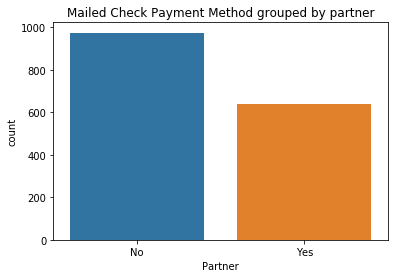

In [14]:
a=df[df['PaymentMethod']=='Mailed check']
sns.countplot(a['Partner'])
plt.title("Mailed Check Payment Method grouped by partner")

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


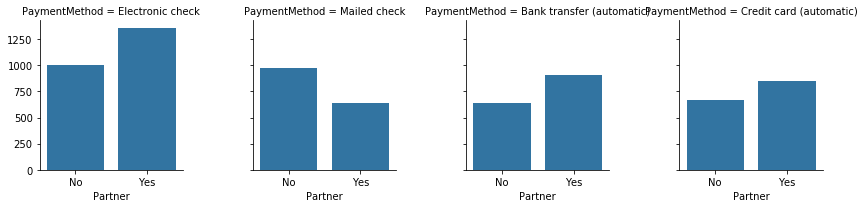

In [15]:
f = sns.FacetGrid(data=df,col='PaymentMethod')
f.map(sns.countplot,'Partner')
plt.tight_layout(w_pad=1)

Seems there is interesting finding that people who paid via Mailed Check are less likely to have partner compared to the other payment method. Let's try to use another feature to find any interesting finding, this time I would use the tenure feature with distribution plot. Just like before, I would create grid with different payment method as the columns.

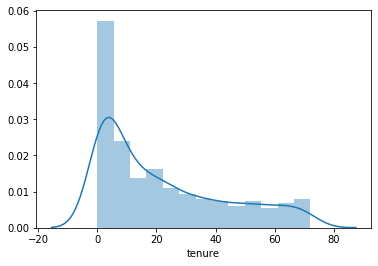

In [16]:
sns.distplot(a['tenure'])
plt.style.use('default')

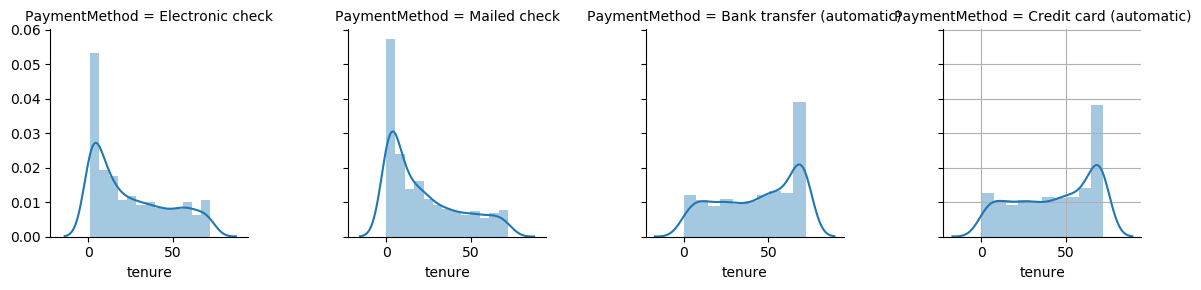

In [17]:
f = sns.FacetGrid(data=df,col='PaymentMethod')
f.map(sns.distplot,'tenure')
plt.tight_layout(w_pad=1)
plt.grid()

## Question 2

From the plot above, what could you conclude about people who paid via mailed check? Also. is there any relationship between the tenure and partner column with the payment method?

as seen from the plots above, people who pay via mailed check are mostly single people who are not married. from the distplot we can also see that people who pay via mailed check have only subsribed to the company for a short period of time compared to those who pay via other payment methods. This may be because new subscribers/customers of a company may still be hesitant in using the companies services so they dont want to use other automatic payment methods such as bank transfer or credit cards, in case they want to suddenly stop their subscription

On the other hand, between the tenure and partner columns, we can only see a trend that when the tenure period is greater, the subscriber has a greater tendency of having a partner, and they mostly pay via automatic methods.

That is enough EDA between feature, now let's focus to the our target (Churn). First, try to visualize the count of the Churn feature

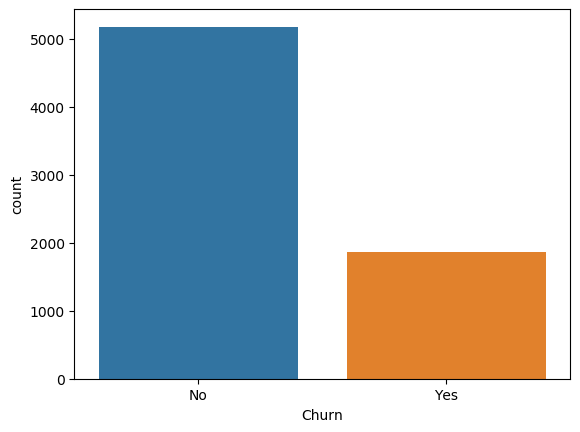

In [18]:
sns.countplot(df['Churn'])

It seems we have a case of imbalanced dataset for churn prediction. Let's try to visualize the distirbution for every category and numerical columns that we have. Before we proceed, replace the SeniorCitizen feature value with 0 as No and 1 as Yes.

*Note: if you use looping for showing all the plot, don't forget to add plt.show() after each iteration*

In [19]:
def zero(x):
    if x==0.0:
        return 0
    else:
        return 1
list_=[]
for i in df['SeniorCitizen']:
    list_.append(zero(i))
df['SeniorCitizen']=list_

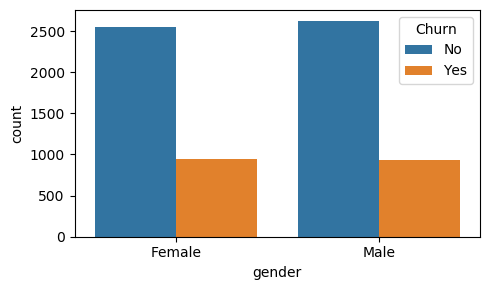

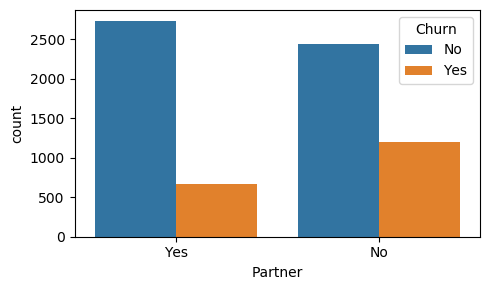

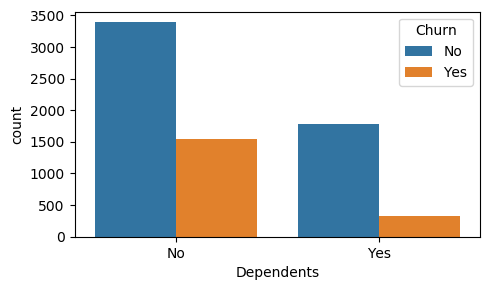

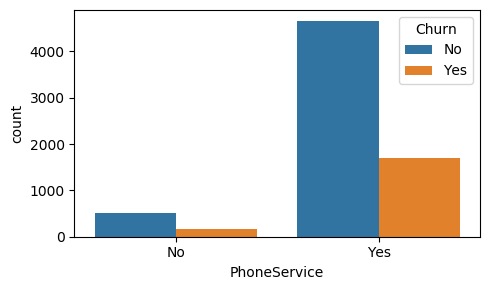

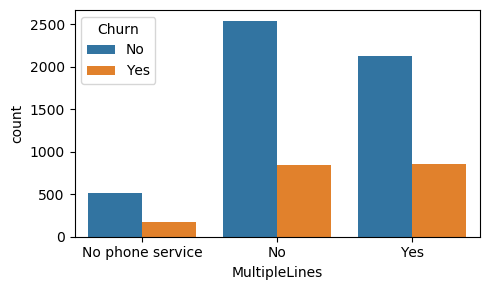

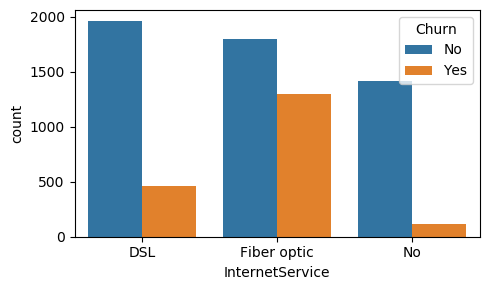

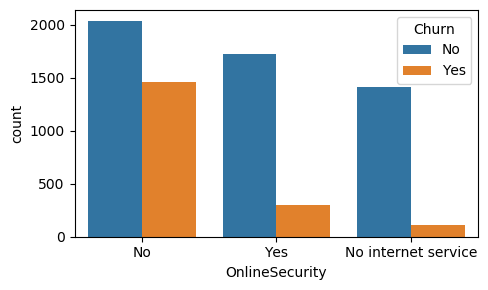

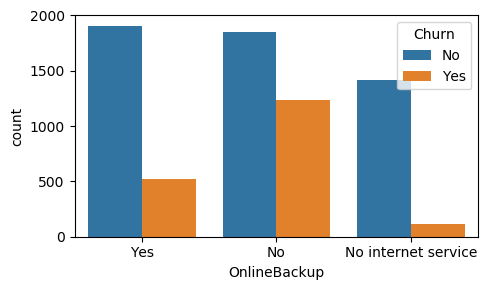

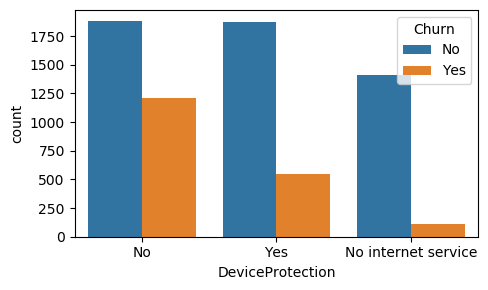

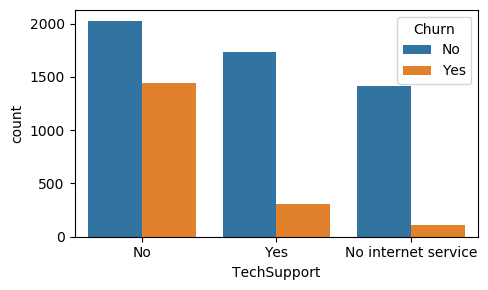

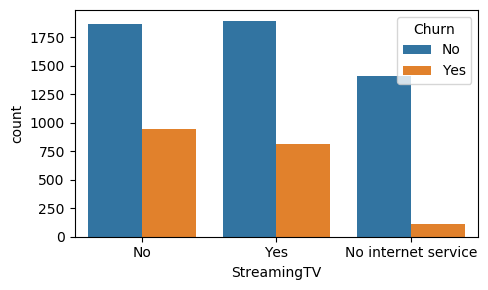

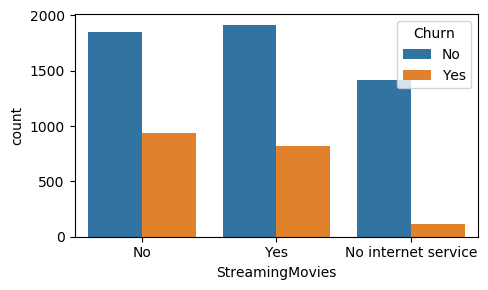

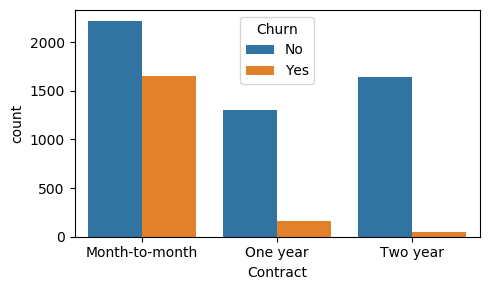

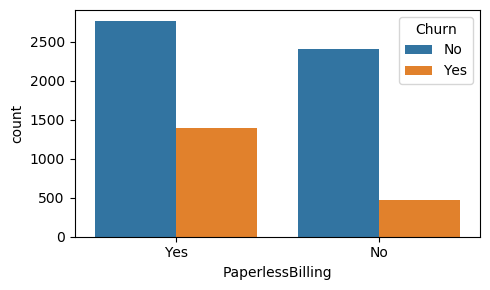

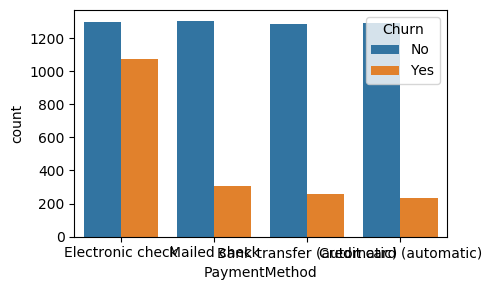

In [20]:
categorical = list(df.select_dtypes('object').columns)
categorical.remove('customerID')
categorical.remove('Churn')

for i in categorical:
    plt.figure(figsize=(5,3))
    sns.countplot(df[i],hue=df['Churn'])
    plt.tight_layout()
    plt.show()
    

In [21]:
numerical = ['tenure','MonthlyCharges','TotalCharges']

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

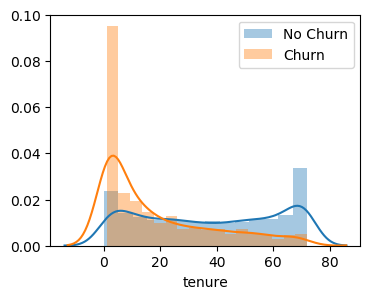

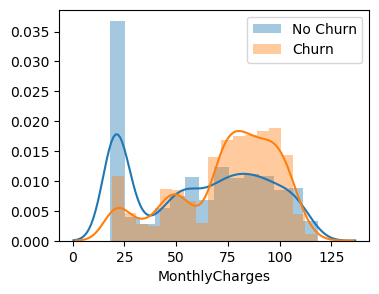

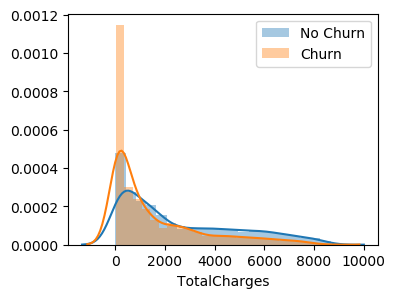

In [23]:
df_churn=df[df['Churn']=='Yes']
df_nochurn=df[df['Churn']=='No']
for i in numerical:
    plt.figure(figsize=(4,3))
    sns.distplot(df_nochurn[i],label='No Churn')
    sns.distplot(df_churn[i],label='Churn')
    plt.legend()
    plt.show()

## Question 3

Is there any interesting insight that you could find from the plot above?

## Answer:

Based on the countplots:

* more churns happen with single people compared to people with partners
* more churns happen when the customer has phone services 
* more churns happen when there people connect to the internet via fibre optics
* more churns happen when customers do not have online security and online backup
* more churns happen when customers do not have tech supprt
* more churn happend when customers do not have device protection
* more churns happen when custoemrs have month-month contract and use Electronic check as payment method

Based on Distribution:
* New customers are more likely to churn than old loyal customers
* customers are more likely to churn when their monthly charges are high (75-100)



As our aim is to use machine learning for prediction, lets prepare our columns to be ready for machine learning activities. First, drop the CustomerID column then change all the category columns into numerical value by using get_dummies (OneHotEncoder) except the target column (Churn). Also, set the drop_first parameter as True.

At the same time, change the Churn feature value with No as 0 and Yes as 1

In [24]:
target=pd.DataFrame()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
data=pd.get_dummies(df[categorical],drop_first=True)

data=data.join(df[numerical])
data.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,29.85,29.85
1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,34,56.95,1889.50
2,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,53.85,108.15
3,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,45,42.30,1840.75
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,2,70.70,151.65


In [26]:
target['Churn']=pd.get_dummies(df['Churn'],drop_first=True)['Yes']


In [27]:
target.head()

,Churn
0,0
1,0
2,1
3,0
4,1


## Unsurpervised Modelling

Before we do any of the supervised modelling, let's do some data mining from our data. Remember, as lot of unsupervised model based on distance means that we need to rescale our data to have a same scale. 

In our case, we would use all the data except the target data for data mining. 

First, use the boxplot to check all the data distribution

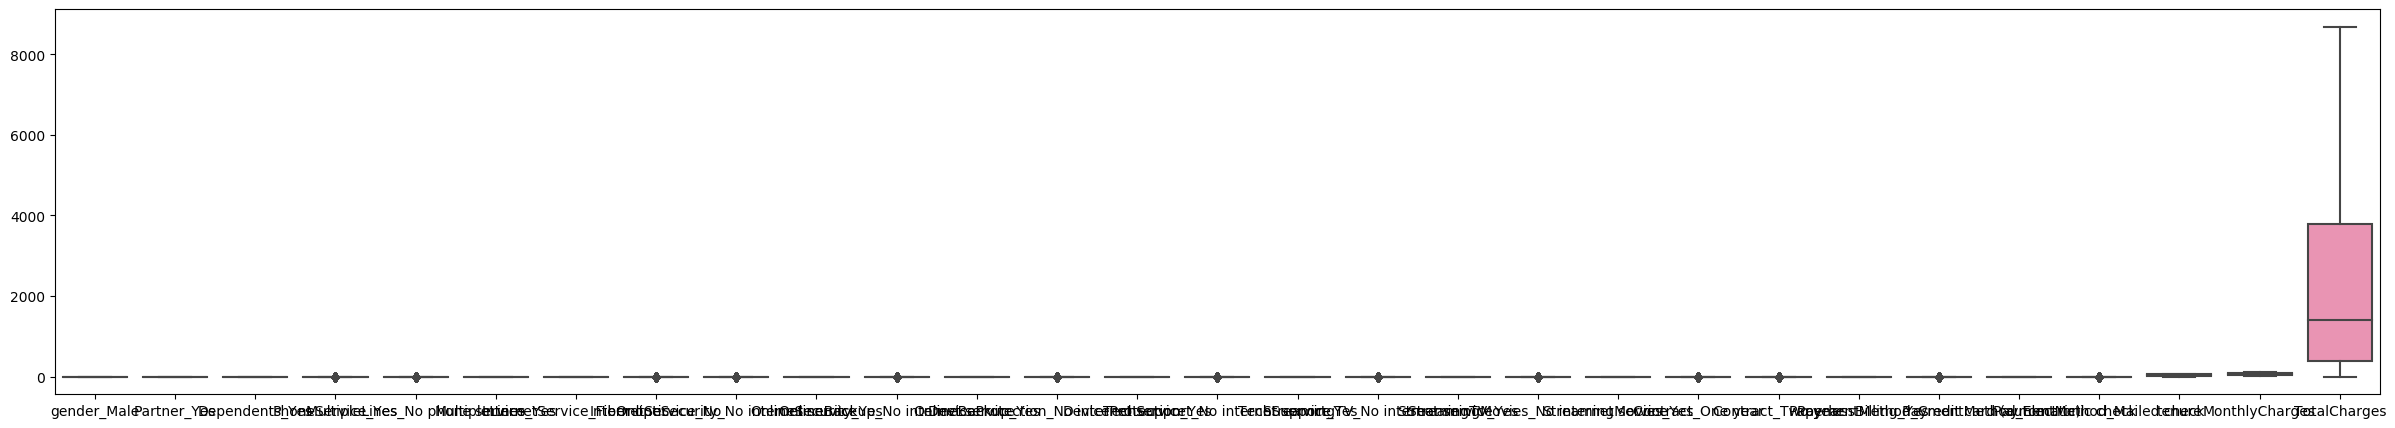

In [28]:
plt.figure(figsize=(30,5))
sns.boxplot(data=data)


Just from the boxplot, we could see that the scale is not similar. In this case, lets rescale all the data by using the StandardScaler then check the data one more time to know our data distribution

In [29]:
from sklearn.preprocessing import StandardScaler as ss

In [30]:
scaler=ss()
scaler.fit(data)
zscore_data = scaler.transform(data)

In [31]:
scaled_df=pd.DataFrame(zscore_data)
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,-1.009559,1.034530,-0.654012,-3.054010,3.054010,-0.854176,-0.885660,-0.525927,-0.525927,-0.633933,-0.525927,1.378241,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807,-1.277445,-1.160323,-0.992611
1,0.990532,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,-0.725563,-0.525927,1.381277,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,1.835513,0.066327,-0.259629,-0.172165
2,0.990532,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,1.378241,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,-0.711026,1.835513,-1.236724,-0.362660,-0.958066
3,0.990532,-0.966622,-0.654012,-3.054010,3.054010,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,-0.725563,-0.525927,1.381277,-0.525927,1.563872,-0.525927,-0.790132,-0.525927,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,-0.544807,0.514251,-0.746535,-0.193672
4,-1.009559,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,1.129102,-0.525927,-0.525927,-0.633933,-0.525927,-0.725563,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807,-1.236724,0.197365,-0.938874


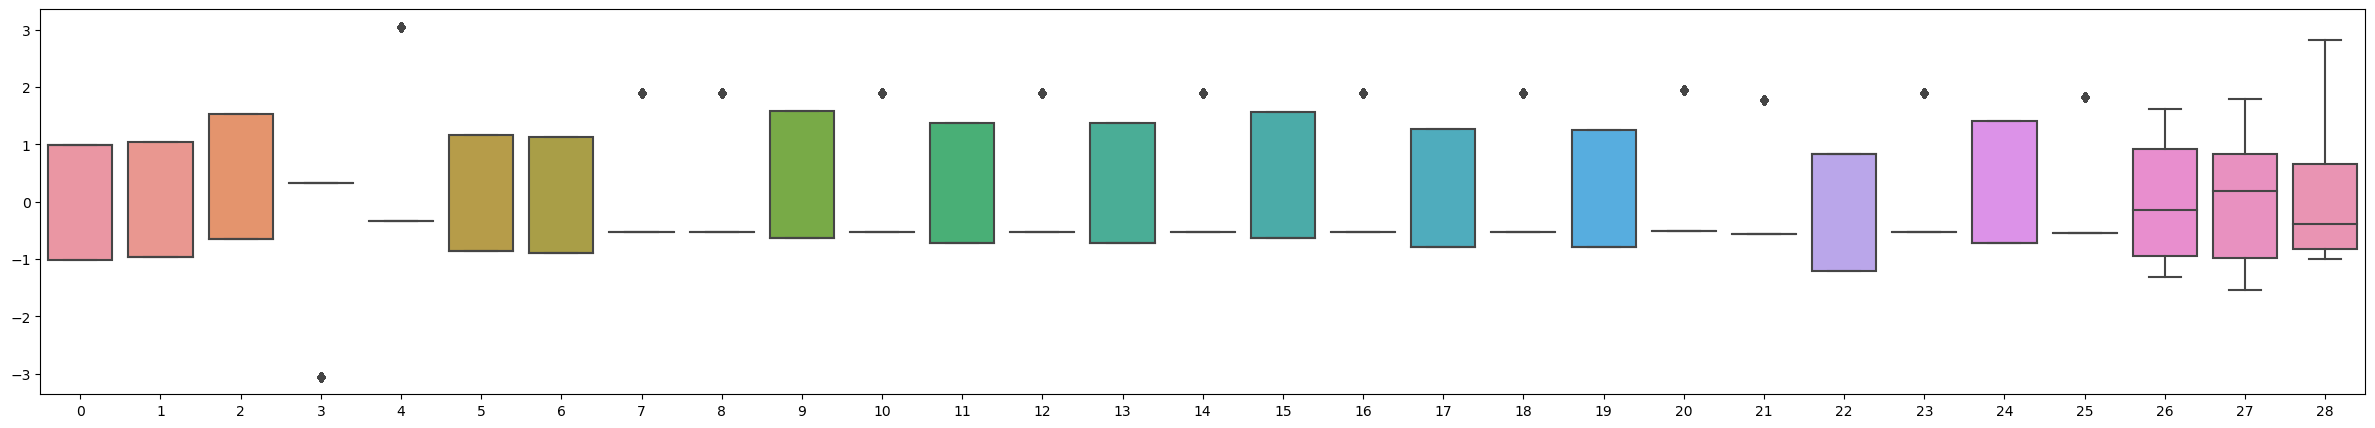

In [32]:
plt.figure(figsize=(30,5))
sns.boxplot(data=zscore_data)

We have lot of feature to be put into our unsupervised model, because of that let's use PCA to reduce our feature to 2 feature with random_state = 101. PC1 and PC2. 

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components=2,random_state=101)


In [35]:
pca.fit(zscore_data,)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=101,
    svd_solver='auto', tol=0.0, whiten=False)

In [36]:
pca_data = pca.transform(zscore_data)
pca_data.shape

(7043, 2)

In [37]:
pca=pd.DataFrame(pca_data,columns=['PC 1','PC 2'])
pca['Churn']=target['Churn']
pca.head()

,PC 1,PC 2,Churn
0,-0.463258,-3.225827,0
1,-0.241081,-0.852513,0
2,-0.193609,-2.141936,1
3,-0.942096,-0.987211,0
4,-0.638308,-3.189605,1


Our 2 PC only explained around 45 variance of the data, but we could just work with this data right now. Let's use the scatter plot to see the distribution of the 2 PC with the Churn feature as the hue

Text(0, 0.5, 'PCA 2')

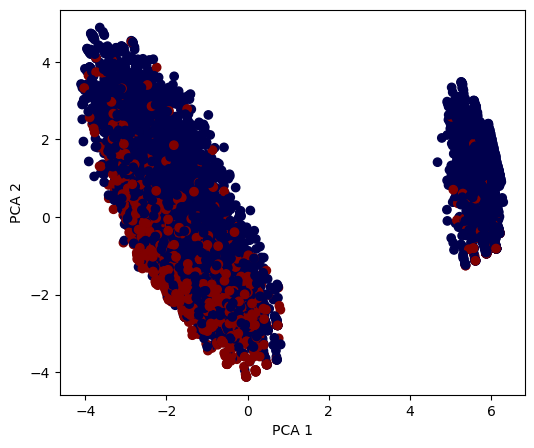

In [38]:
plt.figure(figsize=(6,5))
plt.scatter(pca['PC 1'],pca['PC 2'],c=pca['Churn'],cmap='seismic')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Seems our 2 PC resulting in the 2 different group, it is really interesting as it is not usable for separating our Churn feature but it might end up with another fascinating observation. 

Now, we would use KMeans, DBSCAN, and HDBSCAN to cluster our 2 PC. This time, I already done some analysis and find the best parameter we could use. Try to use the KMeans model with n_cluster = 2, DBSCAN model with eps = 0.4 and min_samples = 2, and HDBSCAN model with min_cluster_size =2 and min_samples = 25

Then create the scatter plot to compare the separation performance of each model. 

In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,random_state=101)
kmeans.fit(pca_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [40]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN (eps= 0.4,min_samples=2)
dbscan.fit(pca_data)
dbscan

DBSCAN(algorithm='auto', eps=0.4, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=None)

In [41]:
from hdbscan import HDBSCAN
hdbscan=HDBSCAN(min_cluster_size=2,min_samples=25)
hdbscan.fit(pca_data)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=2, min_samples=25, p=None,
        prediction_data=False)

In [42]:
df_=pd.DataFrame(pca_data,columns=['pca 1','pca 2'])
df_['K means']=kmeans.labels_
df_['DBSCAN']=dbscan.labels_
df_['HDBSCAN']=hdbscan.labels_
df_.head()

,pca 1,pca 2,K means,DBSCAN,HDBSCAN
0,-0.463258,-3.225827,0,0,0
1,-0.241081,-0.852513,0,0,0
2,-0.193609,-2.141936,0,0,0
3,-0.942096,-0.987211,0,0,0
4,-0.638308,-3.189605,0,0,0


[]

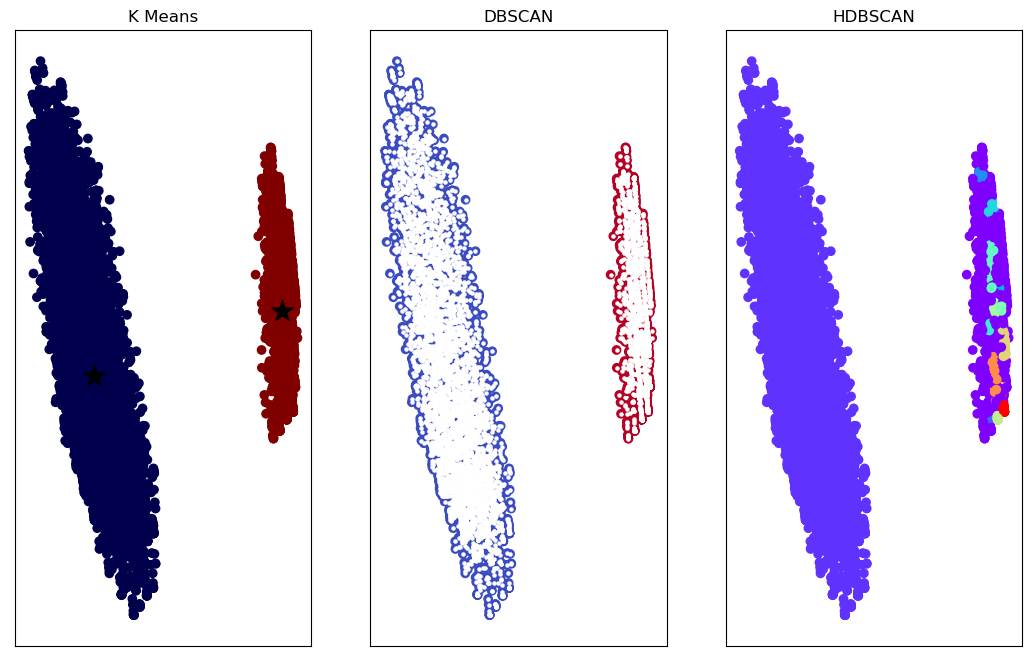

In [43]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True , figsize=(13,8))

ax1.set_title('K Means')
ax1.scatter(df_['pca 1'],df_['pca 2'],c=df_['K means'],cmap='seismic')
centroids = kmeans.cluster_centers_
ax1.scatter(centroids[:,0],centroids[:,1],marker="*",c='black',s=250)
ax1.set_xticks([])
ax1.set_yticks([])

core=dbscan.components_
ax2.set_title('DBSCAN')
ax2.scatter(df_['pca 1'],df_['pca 2'],c=df_['DBSCAN'],cmap='coolwarm')
ax2.scatter(core[:,0],core[:,1],marker='o',c='white',s=5)
ax2.set_xticks([])
ax2.set_yticks([])

ax3.set_title('HDBSCAN')
ax3.scatter(df_['pca 1'],df_['pca 2'],c=df_['HDBSCAN'],cmap='rainbow')
ax3.set_xticks([])
ax3.set_yticks([])

Seems all of our our model resulting in 2 different cluster, just like we expected. Now, return the label from the KMeans model back to the original data and use the pair plot to see the relation between the numerical value with the label as the hue (I am personally name it k-label)

In [44]:
data['k label']=df_['K means']
data.head(15)

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,k label
0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,29.85,29.85,0
1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,34,56.95,1889.50,0
2,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,53.85,108.15,0
3,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,45,42.30,1840.75,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,2,70.70,151.65,0
5,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,8,99.65,820.50,0
6,1,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,22,89.10,1949.40,0
7,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10,29.75,301.90,0
8,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,28,104.80,3046.05,0
9,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,62,56.15,3487.95,0


In [46]:
numerical.append('k label')

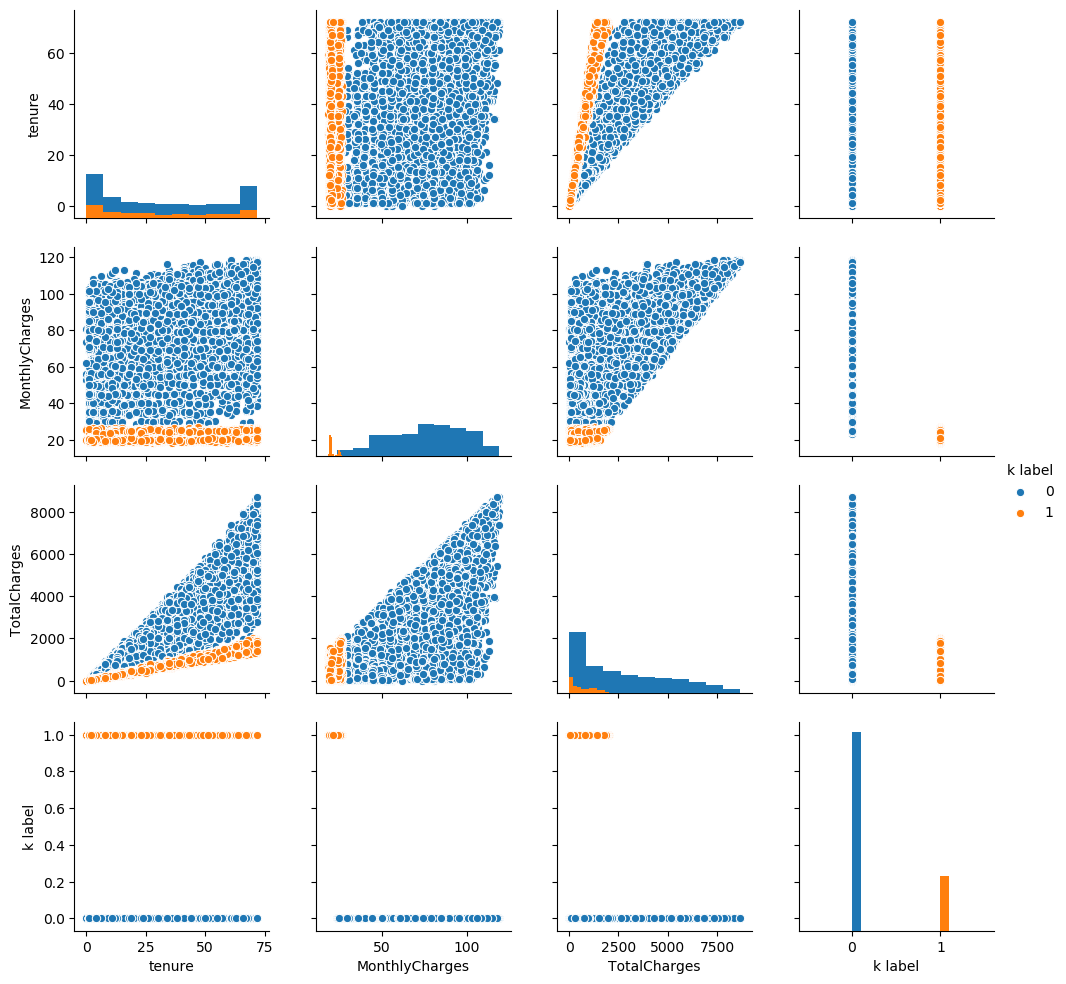

In [47]:
sns.pairplot(data[numerical],hue='k label',diag_kind='hist')

## Question 4
Just strictly from the plot above, What kind of insight you could find there?

## ANswer

Through our use of K Means Clustering, I have found that the data can be clustered into 2 main groups.
The first group has an average tenure that is less than the other group, meaning that most customers in this group are new customers that have not subscribed for a long time. Because they are new, they may have only subscribed to a few of the services provided by the company which results to a small MonthlyCharge value. Lastly, they also have a small value of TotalCharges.

The second group is the oppostie of the first one, they have subscribed to the company for a longer period of time, hence a greater value of total charges. They may also have subscribed to more than one of the companies services, hence a greater value of Monthly charges too.

### Supervised Modelling

First, done the Train Test Split by using random_state=101 and test size =0.2

In [48]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    target['Churn'], test_size=0.2, 
                                                    random_state=101)

If you remember, we have a case of data imbalance for our Churn feature. We could use SMOTE to try oversampling our data. In this time try use SMOTE to our x_train data but keep it in new variable so we would have 2 different kind of x_train; with and without oversampling.

In [65]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority')

oversampled_trainX,oversampled_trainY = sm.fit_sample(X_train,y_train)
oversampled_train=pd.concat([pd.DataFrame(oversampled_trainY),pd.DataFrame(oversampled_trainX)],axis=1)

The Normal X_train data

In [66]:
X_train.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,k label
240,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,72,86.60,6350.50,0
850,0,1,1,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,72,115.80,8476.50,0
2128,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,41,74.55,3023.55,0
596,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,16,54.85,916.15,0
206,1,1,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,1,1,0,0,72,55.45,4179.20,0


The oversampled X_train data

In [67]:
oversampled_trainX.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,k label
0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,72,86.60,6350.50,0
1,0,1,1,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,72,115.80,8476.50,0
2,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,41,74.55,3023.55,0
3,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,16,54.85,916.15,0
4,1,1,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,1,1,0,0,72,55.45,4179.20,0


## Question 5

This time, I would leave the supervised modelling for the Churn feature to be up to you. I would give some criteria that was necessary to get the maximum points. The criteria included:

1. Aim for one of the metric of your choice (either the performance metrics optimization such as increasing the Accuracy, or lowering the loss function such as Log Loss). Give me your reason why you choose these metric. Just aim for one metric, you do not need to try optimize everything.

2. Compare 3 supervise model of your choice. Try to optimize your metric for these 3 model by hyperparameter tuning and use it on both the oversampled data and normal one. Compare the model if there is a difference If you use the oversampled data or not. Then choose to work with the data that you think is the best. If you feel the model of your choice could not be optimized again, then choose the best model with the best hyperparameter. You do not need to really aim for the best model, but I want to see if you know the step of optimizing model and done hyperparameter tuning. We do not need to work on Feature Engineering for this time.

3. From your choice of model and data, use the Feature Importance method to see which feature that affecting the Churn feature. Explain what is your finding. There might be some randomness because of the method, but just try to explain from what the plot is showing. 

4. Lastly, try to see if your model stable or not by using the K-Fold and CV method, as well as to try find the best training size by using the learning curve method. Use all your data again (the data you use for train test split).It does not matter if you model work is based on the oversampled data or not, just use the model base on the complete data (Once again, (the data you use for train test split).

## 1.  Metric : Recall


Usually, there should be a tradeoff between Precision and Recall, but I am using recall as my main focus because I think in this particular case, it is a more significant measure of how well the model is performing. This is because The business is trying to predict which customer will churn, so it is better to have a high recall compared to precision. Because when we compare precisionand recall, it is better for a No to be thought of as a Yes, than a Yes to be thought as a No.

## 2. Logistic regression

In [68]:
def cramers_v(x,y):
    import scipy.stats as ss
    confusion_matrix=pd.crosstab(x,y)
    chi2 =ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr=max(0,phi2 - ((k-1)*(r-1))/(n-1))
    rcorr=r-((r-1)**2)/(n-1)
    kcorr=k-((k-1)**2)/(n-1)
    return(np.sqrt(phi2corr/min((kcorr-1),(rcorr-1))))

In [69]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
prediction = logmodel.predict(X_test)
prediction

array([0, 1, 0, ..., 0, 0, 0], dtype=uint8)

In [71]:
PredictProb = logmodel.predict_proba(X_test)
PredictProb

array([[0.96424948, 0.03575052],
       [0.49562211, 0.50437789],
       [0.81626712, 0.18373288],
       ...,
       [0.99645389, 0.00354611],
       [0.98714826, 0.01285174],
       [0.88285264, 0.11714736]])

In [72]:
PredictProb = logmodel.predict_proba(X_test)
PredictProb

array([[0.96424948, 0.03575052],
       [0.49562211, 0.50437789],
       [0.81626712, 0.18373288],
       ...,
       [0.99645389, 0.00354611],
       [0.98714826, 0.01285174],
       [0.88285264, 0.11714736]])

In [ ]:
predict = []
for pred in PredictProb[:,0]:
    if pred> 0.65 :
        predict.append(0)
    else:
        predict.append(1)

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(oversampled_trainX,oversampled_trainY)
s_prediction=logmodel.predict(X_test)
s_PredictProb=logmodel.predict_proba(X_test)

In [75]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, accuracy_score, matthews_corrcoef, auc, log_loss

### using original data

In [76]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1026
           1       0.67      0.51      0.58       383

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



## orignial data w threshold

In [77]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1026
           1       0.54      0.69      0.61       383

    accuracy                           0.76      1409
   macro avg       0.71      0.74      0.71      1409
weighted avg       0.78      0.76      0.76      1409



## using smote data 

In [78]:
print(classification_report(y_test,s_prediction))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1026
           1       0.57      0.62      0.59       383

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.78      0.77      0.77      1409



## Random Forrest

In [79]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [80]:
rfc.fit(oversampled_trainX,oversampled_trainY)
s_predictions = rfc.predict(X_test)
s_predProb =rfc.predict_proba(X_test)

In [81]:
s_predictions = rfc.predict(X_test)
s_predProb =rfc.predict_proba(X_test)

In [82]:
rfc_pred = rfc.predict(X_test)

rfc_prob = rfc.predict_proba(X_test)
rfc_prob

predict_rfc=[]
for pred in rfc_prob[:,0]:
    if pred> 0.65 :
        predict_rfc.append(0)
    else:
        predict_rfc.append(1)

In [83]:
s_predict_rfc=[]
for pred in s_predProb[:,0]:
    if pred> 0.65 :
        s_predict_rfc.append(0)
    else:
        s_predict_rfc.append(1)

### using original data

In [84]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1026
           1       0.57      0.54      0.55       383

    accuracy                           0.76      1409
   macro avg       0.70      0.69      0.70      1409
weighted avg       0.76      0.76      0.76      1409



### using smote data

In [85]:
print(classification_report(y_test,s_predictions))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1026
           1       0.57      0.54      0.55       383

    accuracy                           0.76      1409
   macro avg       0.70      0.69      0.70      1409
weighted avg       0.76      0.76      0.76      1409



### using threshold with original data

In [86]:
print(classification_report(y_test,predict_rfc))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1026
           1       0.51      0.74      0.60       383

    accuracy                           0.74      1409
   macro avg       0.70      0.74      0.70      1409
weighted avg       0.78      0.74      0.75      1409



### using threshold with smote data

In [87]:
print(classification_report(y_test,s_predict_rfc))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1026
           1       0.51      0.74      0.60       383

    accuracy                           0.74      1409
   macro avg       0.70      0.74      0.70      1409
weighted avg       0.78      0.74      0.75      1409



In [88]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(estimator=rfc,
                     refit = 'accuracy',
                     param_grid= {
                         'n_estimators':[100,200,300,500],
                         'bootstrap':[True,False],
                         'min_samples_split':[5,10,20],
                         'min_samples_leaf':[2,5,10,20],
                         'max_depth':[5,10]
                     },scoring = 'recall',
                      cv=4,
                      n_jobs=-1)


In [ ]:
search.fit(X_train,y_train)
#result of this:
#bootstrap': False,
 #'max_depth': 10,
 #'min_samples_leaf': 2,
 #'min_samples_split': 4,
 #'n_estimators': 200}
#recall==0.5248

In [ ]:
search.fit(oversampled_trainX,oversampled_trainY)
#bootstrap': True,
 #'max_depth': 5,
 #'min_samples_leaf': 2,
 #'min_samples_split': 5,
 #'n_estimators': 100
#recall =0.8418685094554893


In [123]:
rfc=RandomForestClassifier(bootstrap=True,ccp_alpha=0.0, n_estimators=100,
                           max_depth=5, min_samples_leaf=2,min_samples_split=5,
                                              class_weight=None,
                                              criterion='gini',
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_weight_fraction_leaf=0.0, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False)

In [124]:
rfc.fit(oversampled_trainX,oversampled_trainY)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [125]:
s_predictions = rfc.predict(X_test)
s_predProb =rfc.predict_proba(X_test)

In [126]:
print(classification_report(y_test,s_predictions))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1026
           1       0.54      0.74      0.62       383

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409



In [140]:
rfc.feature_importances_

array([0.00139804, 0.00536007, 0.00814709, 0.00137742, 0.00146645,
       0.00354327, 0.1196556 , 0.01866889, 0.02257779, 0.03772419,
       0.01574029, 0.01109918, 0.0134086 , 0.00498162, 0.01440913,
       0.0267852 , 0.01121141, 0.00226068, 0.01307078, 0.00191049,
       0.04081158, 0.10035885, 0.01430369, 0.00382891, 0.08745476,
       0.00155989, 0.21165722, 0.05627238, 0.12822702, 0.02072951])

## ADABOOST

### ADABOOST original data

In [93]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [127]:
dt = DecisionTreeClassifier(min_samples_split = 5, min_samples_leaf = 2, max_depth = 5 )

In [128]:
ada = AdaBoostClassifier(base_estimator =dt,n_estimators = 500, learning_rate = 0.02, algorithm = 'SAMME')

In [129]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [130]:
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=2,
                                                         min_samples_split=5,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [131]:
print(classification_report(y_test, ada.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1026
           1       0.67      0.49      0.57       383

    accuracy                           0.79      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.78      0.79      0.78      1409



In [133]:
print(classification_report(y_test, ada.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1026
           1       0.57      0.66      0.61       383

    accuracy                           0.77      1409
   macro avg       0.72      0.74      0.72      1409
weighted avg       0.78      0.77      0.78      1409



In [148]:
param_grid = {"n_estimators": [200,500,800],
              "learning_rate": np.linspace(0.01, 0.1, 5)
             }

search = GridSearchCV(estimator = ada, param_grid = param_grid, scoring = 'recall', cv = 3)


In [ ]:
search.fit(X_train, y_train)
#this gives bestscore of 0.52

## adaboost smote data

In [146]:
dt = DecisionTreeClassifier(min_samples_split = 3, min_samples_leaf = 2, max_depth = 10 )
dt.fit(oversampled_trainX,oversampled_trainY)
ada.fit(oversampled_trainX,oversampled_trainY)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=2,
                                                         min_samples_split=5,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [147]:
print(classification_report(y_test, ada.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1026
           1       0.57      0.66      0.61       383

    accuracy                           0.77      1409
   macro avg       0.72      0.74      0.72      1409
weighted avg       0.78      0.77      0.78      1409



In [149]:
param_grid = {"n_estimators": [200,500,800],
              "learning_rate": np.linspace(0.01, 0.1, 5)
             }

search = GridSearchCV(estimator = ada, param_grid = param_grid, scoring = 'recall', cv = 3)


In [151]:
search.fit(oversampled_trainX, oversampled_trainY)

GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=5,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=2,
      

In [152]:
search.best_score_

0.8527197284648995

In [154]:
search.best_params_

{'learning_rate': 0.01, 'n_estimators': 200}

In [155]:
print(classification_report(y_test, search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1026
           1       0.55      0.72      0.62       383

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.77      0.77      1409



# 3. Feature Importance

In [103]:
from eli5 import show_weights
from eli5.sklearn import PermutationImportance

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


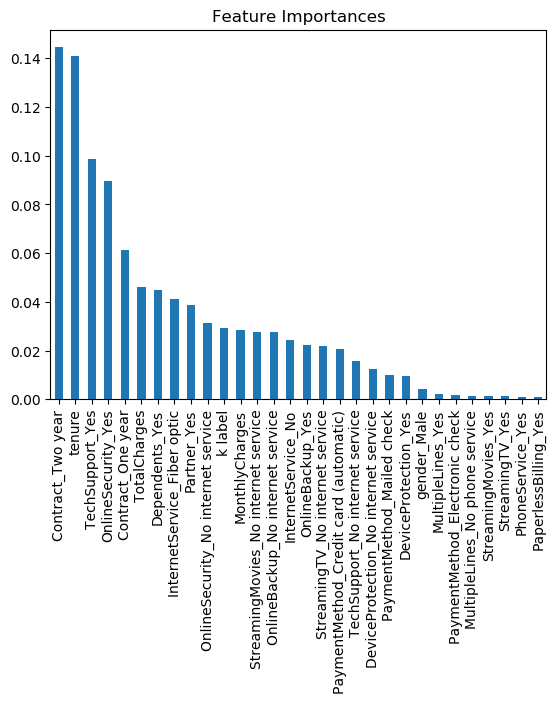

In [135]:
coef1 = pd.Series(rfc.feature_importances_,X_test.columns).sort_values(ascending=False)
coef1.plot(kind='bar',title='Feature Importances')

In [136]:
rfc.fit(oversampled_trainX,oversampled_trainY)

perm=PermutationImportance(rfc, scoring='recall',random_state=101).fit(X_test,y_test)
show_weights(perm,feature_names=list(X_test.columns))

Weight,Feature
0.0877 ± 0.0189,Contract_Two year
0.0308 ± 0.0112,MonthlyCharges
0.0298 ± 0.0078,Contract_One year
0.0235 ± 0.0272,tenure
0.0214 ± 0.0090,InternetService_Fiber optic
0.0188 ± 0.0173,OnlineSecurity_Yes
0.0141 ± 0.0042,PaymentMethod_Credit card (automatic)
0.0115 ± 0.0042,TotalCharges
0.0094 ± 0.0063,InternetService_No
0.0078 ± 0.0074,MultipleLines_Yes


In [137]:
rfc.fit(X_train,y_train)

perm=PermutationImportance(rfc, scoring='recall',random_state=101).fit(X_test,y_test)
show_weights(perm,feature_names=list(X_test.columns))

Weight,Feature
0.1640 ± 0.0153,tenure
0.1389 ± 0.0355,InternetService_Fiber optic
0.0757 ± 0.0219,TotalCharges
0.0747 ± 0.0218,Contract_Two year
0.0574 ± 0.0204,MonthlyCharges
0.0376 ± 0.0228,Contract_One year
0.0167 ± 0.0042,OnlineSecurity_No internet service
0.0157 ± 0.0057,InternetService_No
0.0141 ± 0.0053,PaymentMethod_Electronic check
0.0141 ± 0.0126,DeviceProtection_No internet service


from the table and plot above, there is different variations of feature importances but im going to focus on the one from X_train and Y-train as those are the original data. both table and graph show tenure as one of the most important factors compared to the others, this would mean that customers who have been subscribed to the company for a long time are all loyal and are less likely to unsubscribe from the company.  
Internet service trough fiber optic also has a big impact meaning that, the company provides very good internet service to their customers, but only the ones porvided with fiber optics technology is good enough to keep customers loyal to the company. Those who are provided withouth fibre optics may have a slower performance which cause the customers to be weary in buying from the company, and eventually they will have a higher possibility of unsubsribing from the company.   
Lastly on the graph, it also shows that customers with 2 year contracts are more loyal, which is very obvious because 2 year contracts are more difficult to get out of compared to those customers who pay on a month-to-moth basis, hence they cannot leave the company as easily.

## 4.

Cross validation scores: [0.5033557  0.52348993 0.54362416 0.4966443  0.48648649 0.41216216
 0.4527027  0.50675676 0.4966443  0.5033557 ]


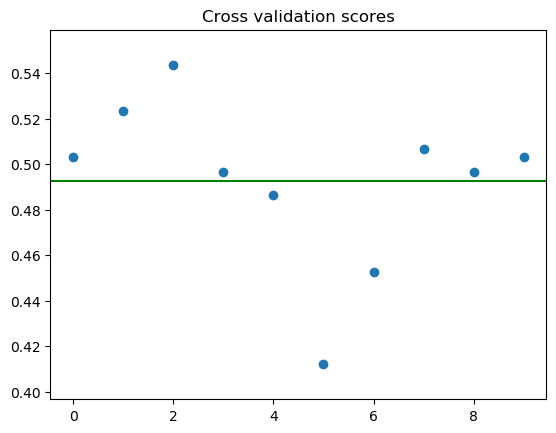

In [107]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=rfc,
                        X=X_train,
                        y=y_train,
                        cv=10,
                        n_jobs=1,
                        scoring='recall')

print('Cross validation scores: {}'.format(scores))

plt.title('Cross validation scores')
plt.scatter(np.arange(len(scores)), scores)
plt.axhline(y=np.mean(scores), color='g') # Mean value of cross validation scores
plt.show()

In [111]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=rfc,
                                                       X=data,
                                                       y=target['Churn'],
                                                       train_sizes=np.linspace(0.5, 1.0, 10),
                                                       cv=8)

[[0.99870172 0.99870172 0.99902629 0.99935086 0.99935086 0.99935086
  0.99935086 0.99935086]
 [0.99824715 0.99824715 0.99824715 0.99853929 0.99941572 0.99941572
  0.99941572 0.99941572]
 [0.99814077 0.99814077 0.99814077 0.99814077 0.99920319 0.99867198
  0.99867198 0.99867198]
 [0.99829601 0.99756573 0.9973223  0.99756573 0.99853944 0.99853944
  0.99853944 0.99853944]
 [0.99820225 0.99775281 0.99730337 0.99752809 0.99842697 0.99820225
  0.99775281 0.99820225]
 [0.99770451 0.99728715 0.99707846 0.99749583 0.99791319 0.99770451
  0.99770451 0.99749583]
 [0.99727308 0.99668874 0.99649396 0.9970783  0.99746786 0.99727308
  0.99766264 0.99766264]
 [0.99744386 0.99707869 0.99689611 0.99707869 0.99762644 0.99762644
  0.99762644 0.99762644]
 [0.99742224 0.99690668 0.99673483 0.99690668 0.99759409 0.99742224
  0.99742224 0.99690668]
 [0.99740344 0.99707887 0.99659202 0.99707887 0.99756573 0.99707887
  0.99740344 0.99691659]]
[0.999148   0.99886795 0.99847278 0.99811344 0.99792135 0.997548
 0.9

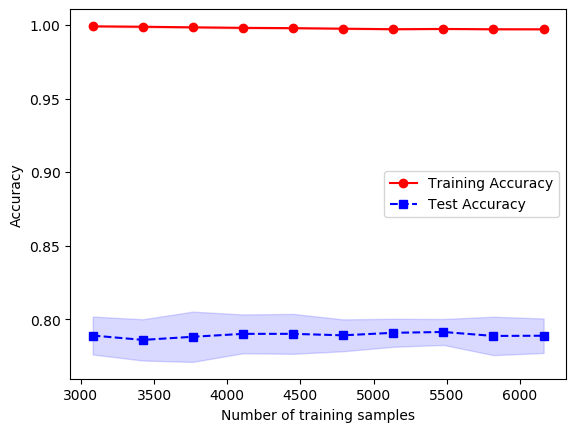

In [141]:
print(train_scores)
# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)
print(train_mean)
print(train_sizes)

# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot training accuracies 
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')

# Plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

the graph above shows that the amount of training and test does not really matter since the blue line keeps going in a horizontal line with a steady accuracy value of more or less 0.78.

On the other hand the cross validation graph shows that the recall value is not steady when using the original data. The recall value keeps changing, moving in between 0.41-0.55. This may be because the data is not evenly distributed hence there could be some bias. That is why in most of my models, the values for recall are usually higher when using the SMOTE data which is already balanced data